<a href="https://colab.research.google.com/github/RinzCSGO/Python/blob/main/Naive_Bayes__lung_cancer_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# source DATA https://www.kaggle.com/datasets/imkrkannan/lung-cancer-dataset-by-staceyinrobert
# Lê Tuấn Kiệt

In [114]:
# import thư viện pandas và numpy

import numpy as np
import pandas as pd

In [115]:
# đọc data
data = pd.read_csv('/content/survey_lung_cancer.csv')

# show 5 dòng đầu 
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [116]:
# info
data.info


<bound method DataFrame.info of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      MALE   69        0               1        1              0   
1      MALE   74        1               0        0              0   
2    FEMALE   59        0               0        0              1   
3      MALE   63        1               1        1              0   
4    FEMALE   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
304  FEMALE   56        0               0        0              1   
305    MALE   70        1               0        0              0   
306    MALE   58        1               0        0              0   
307    MALE   67        1               0        1              0   
308    MALE   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                

In [117]:
# ktra có dữ liệu khuyết không
data.isnull().values.any()

False

In [118]:
# đếm giá trị của cột mục tiêu (LUNG_CANCER)
data["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

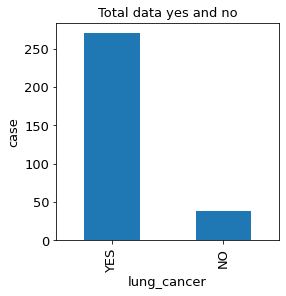

In [119]:
# Trực quan hoá cột (LUNG_CANCER)
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4))
plt.title("Total data yes and no",fontsize=13)
plt.xlabel("lung_cancer", fontsize=13)
plt.ylabel("case",fontsize=13)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=13)
plt.show()

In [120]:
# xử lý data cột GENDER và cột LUNG_CANCER về kiểu số

data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x=='MALE' else 0)
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x=='YES' else 0)
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [121]:
# import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [122]:
# select 15 cột đầu for x ; cột LUNG_CANCER for y
# sử dụng iloc vì nó nhanh hơn,  data.iloc[<row selection>,<column selection>]

x = data.iloc[ :,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data["LUNG_CANCER"].values
x

array([[ 1, 69,  0, ...,  1,  1,  1],
       [ 1, 74,  1, ...,  1,  1,  1],
       [ 0, 59,  0, ...,  1,  0,  1],
       ...,
       [ 1, 58,  1, ...,  0,  0,  1],
       [ 1, 67,  1, ...,  1,  0,  1],
       [ 1, 62,  0, ...,  0,  1,  0]])

In [123]:
# chia tập train:test theo tỉ lệ 75:25 để đánh giá hiệu xuất; thiết lập random_state seed = (19 có độ chính xác khá cao )

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.25 , random_state=19)
print('x_train: ',x_train.shape)
print('x_test: ', x_test.shape)

x_train:  (231, 15)
x_test:  (78, 15)


In [124]:
# naive bayes trên tập train

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
model.predict(x_train)
print("accuracy = " ,accuracy_score(y_test, model.predict(x_test)))

accuracy =  0.9230769230769231


In [134]:
model_predict = model.predict(x_test)

print('accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, model_predict)))
accuracy_score = (metrics.accuracy_score(y_test, model_predict))

# True positive (TP) ; False positive (FP)
# False negative (FN); True negative (TN)
print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

# Báo cáo
print('\nClassification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))

accuracy: 0.92
[[67  2]
 [ 4  5]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        69
           0       0.71      0.56      0.63         9

    accuracy                           0.92        78
   macro avg       0.83      0.76      0.79        78
weighted avg       0.92      0.92      0.92        78



 Precision = (TP/(TP+FP) 

 Recall    = (TP/(TP+FN) 

 F1 Score  = (2/((Precision^-1)+(Recall^-1))


In [126]:
GENDER=1
AGE=20
SMOKING =0
YELLOW_FINGERS = 0
ANXIETY = 0
PEER_PRESSURE = 1
CHRONIC_DISEASE = 0
FATIGUE =1
ALLERGY= 0
WHEEZING = 1
ALCOHOL_CONSUMING = 0
COUGHING = 1
SHORTNESS_OF_BREATH = 1
SWALLOWING_DIFFICULTY = 0
CHEST_PAIN =1

In [133]:
model_predict = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]
model_pred =model.predict(model_predict)

if model_pred == 1:
    result = "Có dấu hiệu bị ung thư phổi"
elif model_pred == 0 :
    result = "Không có dấu hiệu bị ung thư phổi"
else :
    result = "error "

print("Dựa trên thông tin được đưa vào\n với độ chính xác {:.2f} ta có dự đoán:\n >> {}".format((accuracy_score),result))

Dựa trên thông tin được đưa vào
 với độ chính xác 0.92 ta có dự đoán:
 >> Không có dấu hiệu bị ung thư phổi
